Random Variables represent a possible numerical value from a random experiment. There are two types of Random variables: Discrete Random Variables and Continuous Random Variables.

**Discrete Random Variables** - Take on no more than a countable number of values

**Continuous Random Variables** - can take on any value in an interval. Possible values are measured on a continuum.

Probability denotes how likely it is that a random Variable X takes a specific value x denoted P(X) = x , measured on a scale from 0 (the event never occurs) to 1 (the event always occurs).

A probability distribution desceives how a random variable is distributed, it tells us which values a random variable is most likely to take on and which values are less likely. 

In statistics there are a range of precisely defined probability distributions which have different shapes and can be used to model different types of random events. 

The core Probability distributions depend on the type of Random Variable thus we have:

**Discrete probability Distributions** : - Binomial - Poisson - Hypergeometric

**Continuous Probability Distributions** : - Uniform - Normal - Exponential

## The Uniform Distribution

The Uniform distribution is a continuous probability distribution that has equal probability for all equal width intervals within the range of the random variable. Each value within a certain range is equally likely to occur and values outside of the range never occur.
 
The density plot of the uniform distribution, appears flat because no value is more likely or less likely than another.

In [51]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

<Axes: ylabel='Density'>

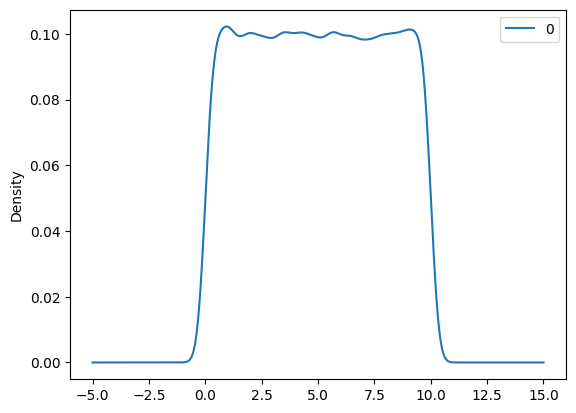

In [52]:
uniform_data = stats.uniform.rvs(size =100000, loc = 0, scale = 10)
pd.DataFrame(uniform_data).plot(kind="density")

Aside:

## Pseudorandom Number generation

The numpy.random module supplements the built in Python random module with functions for effeciently generating whole arrays of sample values from many kinds of probability distributions. 

These random numbers are not truly random but pseudorandom as they are generated by a configurable random number generator that determines what values are created.

The result of a random process can differ from one run to the next. Having results that vary each time is often not desirable. If i wanted someone to reproduce my results exactly i would have a problem using randomization. To ensure the results are the same each time the function is used we can set the random number generators seed value to initialize the intiial state of the generator prior to running.

In [53]:
np.random.seed(4)

print([np.random.uniform(size = (), low = 0, high = 3) for x in range(4)])

print([np.random.uniform(size = (), low = 0, high = 3) for x in range(4)])

np.random.seed(4)
print([np.random.uniform(size = (), low = 0, high = 3) for x in range(4)])

[array(2.90108952), array(1.64169675), array(2.91805308), array(2.14444798)]
[array(2.09318647), array(0.64826849), array(2.92882336), array(0.01869077)]
[array(2.90108952), array(1.64169675), array(2.91805308), array(2.14444798)]


Returning to the Uniform Distribution:

The continuous uniform distribution probability density function is: $ f(x) = 1/(b-a)$ for values in between hte range a and b else wise $f(x) = 0$

For the Uniform distribution $ \mu = (a+b)/2 $ and the variance:  $\sigma^2 = (b-a)^2/ 12$

## The Normal Distribution

The normal or Gaussian distribution is a continuous probability distribution characterized by a symmetric bell-shaped curve. A normal distribution is defined by its center(mean) and spread(standard deviation). The bulk of the observations generated from a normal distribution lie near the mean, which lies at the exact center of the distribution. The normal distribution closely approximates the probability distributions of a wide range of random variables. 

Importantly Distributions of Sample Means apprach a normal distribution given a large sample size.

By varying parameters $\mu$ and $\sigma$ we obtain different normal distributions.

We define normal distribution using the notation $$ X \sim N(\mu, \sigma^2) $$

A rule of thumb iwth the normal distribution:

68% of the data lies within 1 standard deviation of the mean,
95% within 2 standard deviations,
99.7% within 3 standard deviations


In [54]:
# Stats.distribution.cdf() gives us the cumulative distribution funciton which is denoted F(x) for a continuous random variable expresses the probability that X does not not exceed the value x.
# It gives you the area under the distributions density curve to the left of a certain value of the x axis. 

# Lets check the previous percentiles given using the cdf.

import scipy.stats as stats

prob_under_1std = stats.norm.cdf(x = -1, loc = 0, scale = 1) # n.b loc specifies the mean, scale the std , so technically this is the standard normal distribution

prob_over_1std = 1 - stats.norm.cdf(x = 1, loc = 0, scale = 1) # as we want area in tails

between_1std = 1 - (prob_over_1std + prob_under_1std) 

print(prob_under_1std, prob_over_1std , between_1std)

0.15865525393145707 0.15865525393145707 0.6826894921370859


In [55]:
# Stats.distribution.ppf() is the inverse of the cdf() it returns the value associated with a given probability it is the percent point funciton and returns the value of a variable that has a
# given cdf probability

cumulative_probs = [(1 + x) / 2 for x in [0.68, 0.95, 0.997]]  # we want the area to the left of the curve
i = [print(stats.norm.ppf(q = x, loc = 0, scale = 1)) for x in [cumulative_probs]]


[0.99445788 1.95996398 2.96773793]


## The standard normal distribution

Any normal distribution can be transformed into a standardized normal distribution z with mean 0 and variance 1. We do this by $$ z = (X-\mu) / {\sigma} $$

We transform x units into z units. 

The distribution is the same only the scale has been changed. 

The utility of this is that we can use the Standard Normal Distribution Table to find values fo the cumulative normal distribution function. Which for any given z-value a the table shows F(a) area under the curve. Which allows us to find the probability of values below.

# Assessing Normality 

Not all continuous random variables are normally distributed 

It is important to evaluate how well the data is approximated by teh normal distribution before we transform it into the standard normal distribution.

One way to do this is by the normal probability plot. Which arranges data from low to high and finds the Cumulative normal probability for each value.

In [56]:
import os 
os.chdir('C:/Users/George Bresnahan/OneDrive/Desktop/Python Datasets/archive')
os.getcwd()
os.listdir()
car_data = pd.read_csv('mtcars.csv')
car_data.head(5)
mtcars = car_data.rename(columns={'Unnamed: 0': 'model'}).set_index('model')
mtcars.head(5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


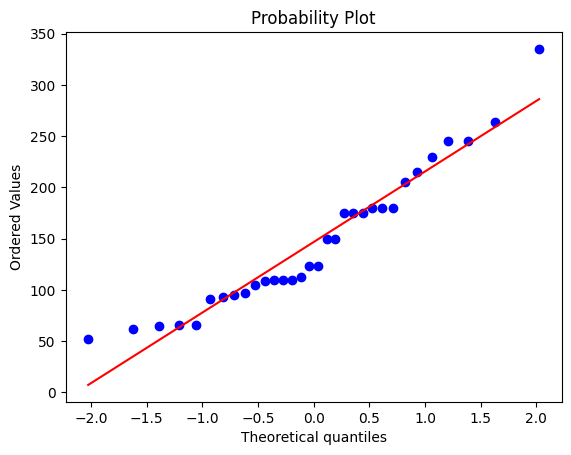

In [57]:
fig = plt.figure()
stats.probplot(x = mtcars['hp'], dist='norm', plot = plt)
plt.show()

## The BINOMIAL Distribution

The Binomial Distribution is a discrete probability distribution that models the outcomes of a given number of random trials of some experiment or event. The binomial probability distribution has:
- a fixed number of observations n
- two mutually exclusive and collectively exhaustive categories
- Constant probability for each observation
- Observations are independent 

The binomial distribution is defined by two parameters: the probability of success in any given trials P and the number of trials n. The binomial distribution tells you how likely it is to achieve a given number of successes in n trials of the experiment. 

An example ofo the Binomial Distributions use would be in the case of flipping a fair coin 10 times, where the number of trials is 10 and teh probability of success is 0.5. The Binomial distribution would tell us how likely it is we get 0,1,2 heads.

In [58]:
fair_coin_flips = stats.binom.rvs(n = 10, p = 0.5, size = 10000)

In [59]:

coin_crosstab = pd.crosstab(index = 'counts', columns = fair_coin_flips)
coin_crosstab

col_0,0,1,2,3,4,5,6,7,8,9,10
row_0,,,,,,,,,,,
counts,10,93,461,1187,2060,2382,2054,1181,453,113,6


array([[<Axes: title={'center': '0'}>]], dtype=object)

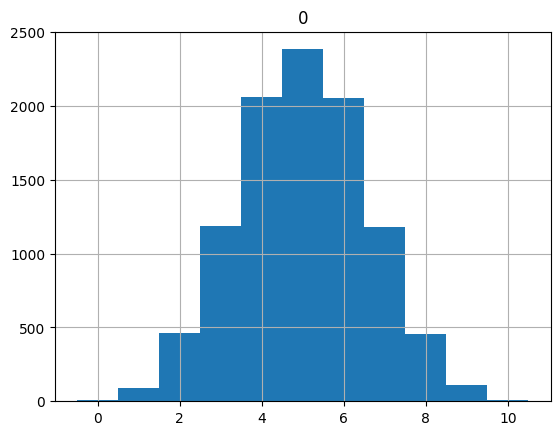

In [65]:
pd.DataFrame(fair_coin_flips).hist(range=(-0.5,10.5), bins= 11)

Since the Binomial Distribution is discrete, it only takes on integer values, meaning we can summarize the binomial data witha a frequency table and its distribution with a histogram. The historgram shows us that a binomial distribution iwht a 50% probability of success is roughly symmetric, with the most likely outcomes lying at the center. 

This looks similar to the normal distribution, and the reason for this is that the Normal Distribution is a good approximation to the Binomial Distribution when n is large. More specifically when $$nP(1-p) > 5 $$

The normal is a very good approximation for the binomial when this condition is met, the implication of this is we can standardize x values of the binomial distribution to a z value. Which allows us using the Z-score table to calculate probabilities of binomially distributed discrete random variables.

## The Hypergeometric and Exponential Distributions

The HyperGeometric (Discrete), Geometric and the Exponential (Continuous) distributions model the time it takes for an event to occur.

The Geometric Distribution models the number of trials it takes to achieve success in repeated experiments with a given probability of success. The Geometric takes a sample with replacement.

The HyperGeometric distribution models the the probability of x success in the sample when there are s successes in the population. The sample is taken without replacement and the outcomes of the trial are dependant on each other. 

The Exponential Distribution is used to model the length of time between two occurences of an event(the time between arrival). It is a continuous analog of the geometric distribution and models that amount of time you have to wait between an event occurs given a certain occurence rate. For example the time between trucks arriving 



## The Poisson Distribution

The Poisson distribution is used to determine the probability of random variables which characterises the number of occurrences or successes of a certain event in a given continuous interval such as time, S.A or length.

Taken from Kaggle

The Poisson distribution models the probability of seeing a certain number of successes within a time interval, where the time it takes for the next success is modeled by an exponential distribution. The Poisson distribution can be used to model traffic, such as number of arrivals at hospital in an hours time.

We assume an interval is divided into a very large number of equal subintervals where the probability of occurrence of an event in any subinterval is very small.

We assume the probability of the occurence of an event is constant for all subintervals, there can be no more than once occurence in each subinterval, and occurences are independent i.e one occurence does not influence the probability of an occurence in another interval.



The Poisson approximation to the Binomial Distribution.  If the number of trials n is large and nP is of moderate size <= 7, the distribution can be approximated by the Poisson distribution.